# Essential pandas for Data Science

In [1]:
import pandas as pd
import numpy as np

## Inspecting a DataFrame

In [2]:
# Import data

df = pd.read_csv("data/fb_posts_2020.csv")
df.head()

,id,bkk_datetime,type,message,link,likes,comments,shares,reactions,love,care,haha,wow,sad,angry,promotion_status
0,352750091735719_1078063505871037,Wed Jan 1 00:00:04 2020,link,��Happy New Year 2020!\n.\n��ขอบคุณผู้เรียนกว่...,NaN,22,0,3,27,4,NaN,0,1,0,0,ineligible
1,352750091735719_1083480448662676,Mon Jan 6 08:00:09 2020,album,"ถ้าคุณบอกว่า ""องค์กรคุณเป็น Data-Driven Organi...",https://www.facebook.com/352750091735719/posts...,49,1,51,51,1,NaN,0,1,0,0,inactive
2,352750091735719_1085022075175180,Tue Jan 7 11:33:26 2020,photo,NaN,https://www.facebook.com/352750091735719,8,0,0,8,0,NaN,0,0,0,0,ineligible
3,352750091735719_1085316095145778,Tue Jan 7 19:38:58 2020,video,�� ครบรอบหนึ่งปี EP แรกของรายการ So-sci-tist\n...,https://www.facebook.com/skooldio/videos/25337...,23,0,13,25,1,NaN,0,1,0,0,ineligible
4,352750091735719_1088828331461221,Sat Jan 11 09:19:30 2020,album,"""เด็กไทยยุคใหม่ รู้รักสามัคคี รู้หน้าที่พลเมือ...",https://www.facebook.com/352750091735719/posts...,14,0,4,20,2,NaN,1,3,0,0,ineligible


In [3]:
# Inspect the number of rows and columns

df.shape

(782, 16)

In [4]:
# Overview data

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                782 non-null    object 
 1   bkk_datetime      782 non-null    object 
 2   type              770 non-null    object 
 3   message           693 non-null    object 
 4   link              760 non-null    object 
 5   likes             782 non-null    int64  
 6   comments          782 non-null    int64  
 7   shares            782 non-null    int64  
 8   reactions         782 non-null    int64  
 9   love              782 non-null    int64  
 10  care              606 non-null    float64
 11  haha              782 non-null    int64  
 12  wow               782 non-null    int64  
 13  sad               782 non-null    int64  
 14  angry             782 non-null    int64  
 15  promotion_status  782 non-null    object 
dtypes: float64(1), int64(9), object(6)
memory us

,likes,comments,shares,reactions,love,care,haha,wow,sad,angry
count,782.000000,782.000000,782.000000,782.000000,782.000000,606.0,782.000000,782.000000,782.000000,782.000000
mean,78.602302,3.611253,125.892583,83.108696,2.530691,0.0,0.529412,1.391304,0.033248,0.021739
std,146.401642,19.877017,785.545808,149.987288,5.547694,0.0,3.974120,1.724368,0.337831,0.228087
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,19.250000,0.000000,4.000000,21.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,41.000000,0.000000,20.000000,44.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000
75%,91.000000,1.000000,67.000000,97.750000,3.000000,0.0,0.000000,2.000000,0.000000,0.000000
max,2024.000000,287.000000,14880.000000,2060.000000,66.000000,0.0,67.000000,17.000000,8.000000,4.000000


## Transforming Data

In [5]:
# Calculate engagement score

df['engage_score'] = df['likes'] + (5 * df['comments']) + (20 * df['shares'])
df[['bkk_datetime', 'likes', 'comments', 'shares', 'engage_score']].head()

,bkk_datetime,likes,comments,shares,engage_score
0,Wed Jan 1 00:00:04 2020,22,0,3,82
1,Mon Jan 6 08:00:09 2020,49,1,51,1074
2,Tue Jan 7 11:33:26 2020,8,0,0,8
3,Tue Jan 7 19:38:58 2020,23,0,13,283
4,Sat Jan 11 09:19:30 2020,14,0,4,94


In [6]:
# Adjust max engage score to 100

df['adjust_engage_score'] = (df['engage_score']/df['engage_score'].max()) * 100
df[['likes', 'comments', 'shares', 'engage_score', 'adjust_engage_score']].head()

,likes,comments,shares,engage_score,adjust_engage_score
0,22,0,3,82,0.027296
1,49,1,51,1074,0.357513
2,8,0,0,8,0.002663
3,23,0,13,283,0.094205
4,14,0,4,94,0.031291


In [7]:
# Calculate cumulative sum of Likes & shares

df['cum_likes'] = df['likes'].cumsum()
df['cum_shares'] = df['shares'].cumsum()
df[['likes', 'cum_likes', 'cum_shares']]

,likes,cum_likes,cum_shares
0,22,22,3
1,49,71,54
2,8,79,54
3,23,102,67
4,14,116,71
...,...,...,...
777,118,61245,98271
778,53,61298,98313
779,48,61346,98344
780,69,61415,98428


In [8]:
# Data binning

likes_bin_cut = pd.cut(df['likes'], bins=4)
likes_bin_cut

0      (-2.024, 506.0]
1      (-2.024, 506.0]
2      (-2.024, 506.0]
3      (-2.024, 506.0]
4      (-2.024, 506.0]
            ...       
777    (-2.024, 506.0]
778    (-2.024, 506.0]
779    (-2.024, 506.0]
780    (-2.024, 506.0]
781    (-2.024, 506.0]
Name: likes, Length: 782, dtype: category
Categories (4, interval[float64, right]): [(-2.024, 506.0] < (506.0, 1012.0] < (1012.0, 1518.0] < (1518.0, 2024.0]]

In [9]:
likes_bin_cut.value_counts()

(-2.024, 506.0]     774
(506.0, 1012.0]       5
(1518.0, 2024.0]      3
(1012.0, 1518.0]      0
Name: likes, dtype: int64

In [10]:
likes_bin_qcut = pd.qcut(df['likes'], q=4)
likes_bin_qcut

0        (19.25, 41.0]
1         (41.0, 91.0]
2      (-0.001, 19.25]
3        (19.25, 41.0]
4      (-0.001, 19.25]
            ...       
777     (91.0, 2024.0]
778       (41.0, 91.0]
779       (41.0, 91.0]
780       (41.0, 91.0]
781       (41.0, 91.0]
Name: likes, Length: 782, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 19.25] < (19.25, 41.0] < (41.0, 91.0] < (91.0, 2024.0]]

In [11]:
likes_bin_qcut.value_counts()

(19.25, 41.0]      198
(-0.001, 19.25]    196
(91.0, 2024.0]     195
(41.0, 91.0]       193
Name: likes, dtype: int64

In [12]:
df['q_likes'] = pd.qcut(df['likes'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df[['likes', 'q_likes']]

,likes,q_likes
0,22,Q2
1,49,Q3
2,8,Q1
3,23,Q2
4,14,Q1
...,...,...
777,118,Q4
778,53,Q3
779,48,Q3
780,69,Q3


In [13]:
bins = np.arange(0, df['likes'].max()+50, 50)
pd.cut(df['likes'], bins=bins)

0         (0, 50]
1         (0, 50]
2         (0, 50]
3         (0, 50]
4         (0, 50]
          ...    
777    (100, 150]
778     (50, 100]
779       (0, 50]
780     (50, 100]
781     (50, 100]
Name: likes, Length: 782, dtype: category
Categories (41, interval[int64, right]): [(0, 50] < (50, 100] < (100, 150] < (150, 200] ... (1850, 1900] < (1900, 1950] < (1950, 2000] < (2000, 2050]]

In [14]:
# Extract substrings

df['dow'] = df['bkk_datetime'].str[0:3] # day of week
df[['bkk_datetime', 'dow']].head()

,bkk_datetime,dow
0,Wed Jan 1 00:00:04 2020,Wed
1,Mon Jan 6 08:00:09 2020,Mon
2,Tue Jan 7 11:33:26 2020,Tue
3,Tue Jan 7 19:38:58 2020,Tue
4,Sat Jan 11 09:19:30 2020,Sat


In [15]:
df['dow'].value_counts()

Thu    143
Tue    132
Wed    122
Fri    110
Mon     99
Sat     94
Sun     82
Name: dow, dtype: int64

In [16]:
df['message'].str.contains('data', case=False)

0      False
1       True
2        NaN
3       True
4      False
       ...  
777     True
778     True
779    False
780    False
781    False
Name: message, Length: 782, dtype: object

In [19]:
df['n_hashtags'] = df['message'].str.count('#')
df[['message', 'n_hashtags']].sample(5)

,message,n_hashtags
54,"""ขอวางแผนให้ดีก่อน""\n""อยากให้ผลงานสมบูรณ์กว่าน...",2.0
396,#ตอนที่2มาล้าววว การใช้ Big Data สำหรับองค์กรข...,5.0
9,��‍�� ครูที่คูล คือครูที่สคูลดิโอ #หยอกๆ\n.\nว...,2.0
345,ฟรี❗#สูตรลัดคัดพิเศษ ฉบับเด็ก Harvard Business...,4.0
314,��‍♂ เปลี่ยน ‘ลูกค้าขาจร’ ให้เป็น ��️ ‘ลูกค้า...,2.0


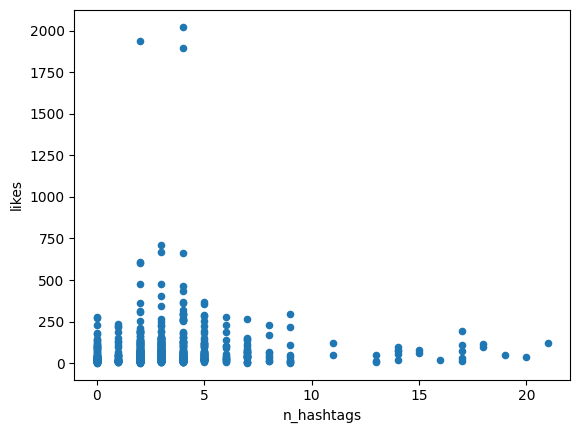

In [20]:
df.plot(x='n_hashtags', y='likes', kind='scatter');

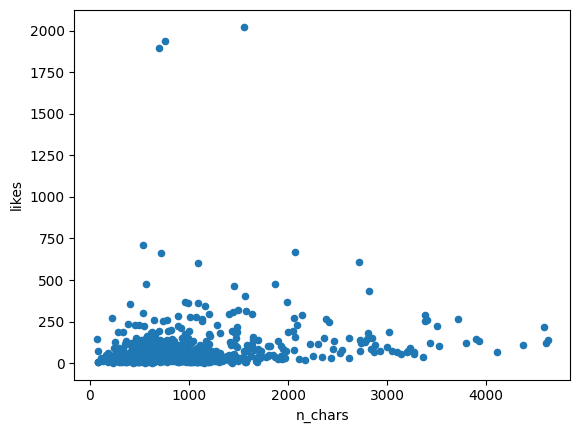

In [21]:
df['n_chars'] = df['message'].str.len()
df.plot(x='n_chars', y='likes', kind='scatter');

In [22]:
# Transform datetime data

df['post_dt'] = pd.to_datetime(df['bkk_datetime'], format='%a %b %d %H:%M:%S %Y')
df[['bkk_datetime', 'post_dt']].head()

,bkk_datetime,post_dt
0,Wed Jan 1 00:00:04 2020,2020-01-01 00:00:04
1,Mon Jan 6 08:00:09 2020,2020-01-06 08:00:09
2,Tue Jan 7 11:33:26 2020,2020-01-07 11:33:26
3,Tue Jan 7 19:38:58 2020,2020-01-07 19:38:58
4,Sat Jan 11 09:19:30 2020,2020-01-11 09:19:30


In [23]:
df['post_hour'] = df['post_dt'].dt.hour
df[['bkk_datetime', 'post_dt', 'post_hour']].head()

,bkk_datetime,post_dt,post_hour
0,Wed Jan 1 00:00:04 2020,2020-01-01 00:00:04,0
1,Mon Jan 6 08:00:09 2020,2020-01-06 08:00:09,8
2,Tue Jan 7 11:33:26 2020,2020-01-07 11:33:26,11
3,Tue Jan 7 19:38:58 2020,2020-01-07 19:38:58,19
4,Sat Jan 11 09:19:30 2020,2020-01-11 09:19:30,9


In [24]:
df['post_hour'].value_counts().sort_index()

0       1
6       1
7      24
8     120
9      33
10     25
11     19
12     86
13     26
14     38
15     21
16     39
17     57
18     99
19    102
20     66
21     20
22      4
23      1
Name: post_hour, dtype: int64

In [28]:
df['post_date'] = df['post_dt'].dt.strftime('%Y-%m-%d')
df[['bkk_datetime', 'post_dt', 'post_hour', 'post_date']].head()

,bkk_datetime,post_dt,post_hour,post_date
0,Wed Jan 1 00:00:04 2020,2020-01-01 00:00:04,0,2020-01-01
1,Mon Jan 6 08:00:09 2020,2020-01-06 08:00:09,8,2020-01-06
2,Tue Jan 7 11:33:26 2020,2020-01-07 11:33:26,11,2020-01-07
3,Tue Jan 7 19:38:58 2020,2020-01-07 19:38:58,19,2020-01-07
4,Sat Jan 11 09:19:30 2020,2020-01-11 09:19:30,9,2020-01-11


In [29]:
type(df.loc[0, 'post_date'])

str

In [30]:
df['post_date'] = pd.to_datetime(df['post_date'], format='%Y-%m-%d')

type(df.loc[0, 'post_date'])

pandas._libs.tslibs.timestamps.Timestamp

In [31]:
df['post_dt'].dt.floor('D')

0     2020-01-01
1     2020-01-06
2     2020-01-07
3     2020-01-07
4     2020-01-11
         ...    
777   2020-12-28
778   2020-12-29
779   2020-12-29
780   2020-12-30
781   2020-12-31
Name: post_dt, Length: 782, dtype: datetime64[ns]

In [32]:
time_diff = df.loc[1, 'post_dt'] - df.loc[0, 'post_dt']
time_diff

Timedelta('5 days 08:00:05')

In [33]:
time_diff.days

5

In [34]:
time_diff.seconds

28805

In [35]:
df['post_diff'] = df['post_date'].diff()

In [36]:
df[['bkk_datetime', 'post_dt', 'post_hour', 'post_date', 'post_diff']].head()

,bkk_datetime,post_dt,post_hour,post_date,post_diff
0,Wed Jan 1 00:00:04 2020,2020-01-01 00:00:04,0,2020-01-01,NaT
1,Mon Jan 6 08:00:09 2020,2020-01-06 08:00:09,8,2020-01-06,5 days
2,Tue Jan 7 11:33:26 2020,2020-01-07 11:33:26,11,2020-01-07,1 days
3,Tue Jan 7 19:38:58 2020,2020-01-07 19:38:58,19,2020-01-07,0 days
4,Sat Jan 11 09:19:30 2020,2020-01-11 09:19:30,9,2020-01-11,4 days


In [37]:
df['post_diff'].value_counts()

0 days    444
1 days    320
2 days     12
3 days      2
5 days      1
4 days      1
6 days      1
Name: post_diff, dtype: int64

## Aggregate and Summarize data

In [38]:
df.nunique()

id                     782
bkk_datetime           778
type                     5
message                693
link                   745
likes                  211
comments                35
shares                 222
reactions              217
love                    26
care                     1
haha                    19
wow                     14
sad                      4
angry                    5
promotion_status         2
engage_score           595
adjust_engage_score    595
cum_likes              779
cum_shares             677
q_likes                  4
dow                      7
n_hashtags              20
n_chars                580
post_dt                778
post_hour               19
post_date              338
post_diff                7
dtype: int64

In [39]:
df['type'].unique()

array(['link', 'album', 'photo', 'video', 'event', nan], dtype=object)

In [40]:
df['type'].value_counts()

photo    418
album    126
link     102
video     65
event     59
Name: type, dtype: int64

In [41]:
df['type'].value_counts(dropna=False)

photo    418
album    126
link     102
video     65
event     59
NaN       12
Name: type, dtype: int64

In [42]:
df['type'].value_counts(normalize=True)

photo    0.542857
album    0.163636
link     0.132468
video    0.084416
event    0.076623
Name: type, dtype: float64

In [43]:
df['type'].value_counts(normalize=True).to_frame('ratio')

,ratio
photo,0.542857
album,0.163636
link,0.132468
video,0.084416
event,0.076623


In [44]:
df.describe(include='O') # O means object

,id,bkk_datetime,type,message,link,promotion_status,dow
count,782,782,770,693,760,782,782
unique,782,778,5,693,745,2,7
top,352750091735719_1078063505871037,Tue Mar 31 14:00:01 2020,photo,��Happy New Year 2020!\n.\n��ขอบคุณผู้เรียนกว่...,https://www.facebook.com/352750091735719,inactive,Thu
freq,1,5,418,1,10,659,143


In [45]:
df[['type', 'promotion_status']] = df[['type', 'promotion_status']].astype('category')
df.describe(include='category')

,type,promotion_status,q_likes
count,770,782,782
unique,5,2,4
top,photo,inactive,Q2
freq,418,659,198


In [46]:
df.groupby('type')[['likes', 'shares']].mean()

,likes,shares
type,,
album,56.365079,60.857143
event,34.186441,0.000000
link,57.343137,79.862745
photo,99.803828,188.543062
video,70.923077,58.430769


In [47]:
df.groupby('type')['likes'].max().to_frame('max_likes')

,max_likes
type,
album,267
event,419
link,711
photo,2024
video,355


In [48]:
df.sort_values(by='likes', ascending=False).groupby('type').first()

,id,bkk_datetime,message,link,likes,comments,shares,reactions,love,care,...,cum_likes,cum_shares,q_likes,dow,n_hashtags,n_chars,post_dt,post_hour,post_date,post_diff
type,,,,,,,,,,,,,,,,,,,,,
album,352750091735719_1192896261054427,Wed May 20 17:00:00 2020,��‍����‍�� #รู้น้าาคิดไรอยู่ ช่วงนี้ที่เราประก...,https://www.facebook.com/352750091735719/posts...,267,12,274,297,21,0.0,...,12491,13345,Q4,Wed,4.0,1135.0,2020-05-20 17:00:00,17,2020-05-20,0 days
event,352750091735719_1385436178307556,Wed May 20 12:50:16 2020,Skooldio x Facebook Developer Circle: Bangkok ...,https://www.facebook.com/events/1385436178307556/,419,0,0,421,2,0.0,...,12130,13037,Q4,Wed,0.0,300.0,2020-05-20 12:50:16,12,2020-05-20,1 days
link,352750091735719_1150195981991122,Sun Mar 29 19:00:57 2020,ฟรี❗สูตรลัดคัดพิเศษ..เทคนิคง่ายๆ ช่วยแก้ปัญหา ...,https://to.skooldio.com/71EML7V4b5,711,6,1429,721,10,0.0,...,6838,7585,Q4,Sun,3.0,535.0,2020-03-29 19:00:57,19,2020-03-29,1 days
photo,352750091735719_1369945536682831,Thu Dec 24 08:27:00 2020,�� #เรียนฟรีนะเธอ #ได้ใบเซอร์อีกต่างหาก �� จะพ...,https://www.facebook.com/skooldio/photos/a.457...,2024,287,13621,2060,26,0.0,...,60716,97691,Q4,Thu,4.0,1556.0,2020-12-24 08:27:00,8,2020-12-24,1 days
video,352750091735719_1242693232741396,Wed Jul 22 15:42:58 2020,มาออกแบบ UI ให้เจ๋งกว่าเดิมด้วย ���������� เคร...,https://www.facebook.com/skooldio/videos/11423...,355,8,169,369,8,0.0,...,21998,22845,Q4,Wed,5.0,405.0,2020-07-22 15:42:58,15,2020-07-22,0 days


In [49]:
df.groupby('type')['id'].nunique()

type
album    126
event     59
link     102
photo    418
video     65
Name: id, dtype: int64

In [50]:
df.groupby(['type', 'promotion_status'])['likes'].mean().to_frame('avg_likes').reset_index()

,type,promotion_status,avg_likes
0,album,inactive,57.195122
1,album,ineligible,22.333333
2,event,inactive,NaN
3,event,ineligible,34.186441
4,link,inactive,62.080460
5,link,ineligible,29.866667
6,photo,inactive,104.248718
7,photo,ineligible,37.892857
8,video,inactive,83.978723
9,video,ineligible,36.833333


In [51]:
df.groupby('type')[['likes', 'shares']].agg(['mean', 'median', 'max', 'min', 'sum']).round(2).astype(int)

likes                         shares                         
       mean median   max min    sum   mean median    max min    sum
type                                                               
album    56     42   267   4   7102     60     22    605   0   7668
event    34     12   419   0   2017      0      0      0   0      0
link     57     34   711   5   5849     79     27   1429   0   8146
photo    99     55  2024   0  41718    188     25  14880   0  78811
video    70     42   355   3   4610     58     23    376   1   3798

## Visualize data

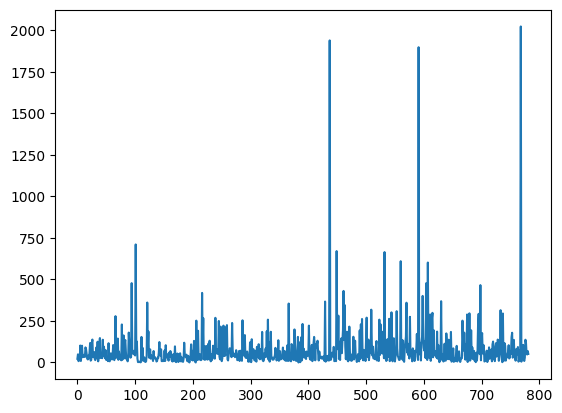

In [52]:
df['likes'].plot(kind='line');

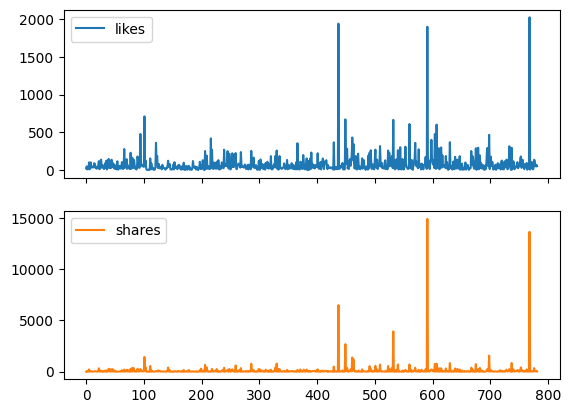

In [54]:
df[['likes', 'shares']].plot(kind='line', subplots=True);

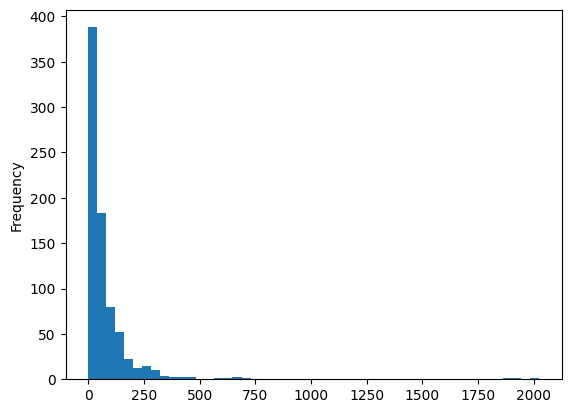

In [55]:
df['likes'].plot(kind='hist', bins=50);

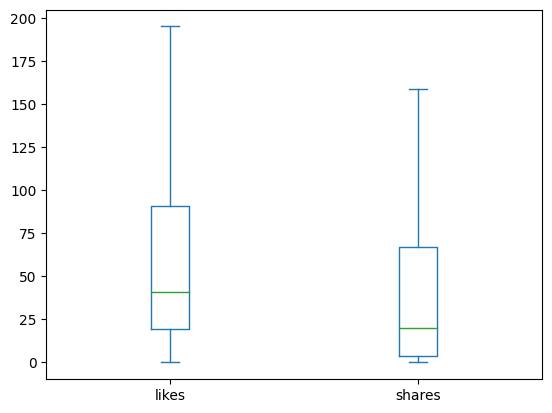

In [56]:
df[['likes', 'shares']].plot(kind='box', showfliers=False);

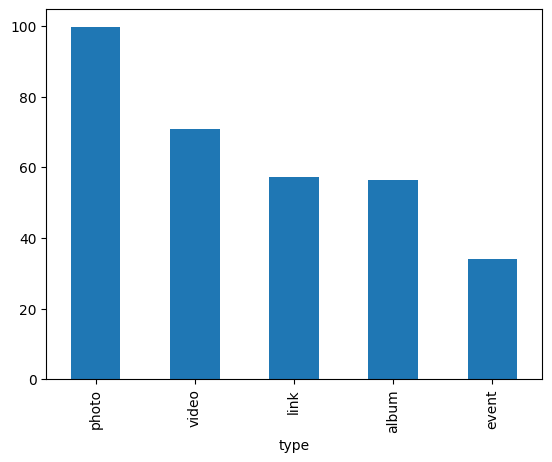

In [57]:
avg_by_type = df.groupby('type')['likes'].mean().sort_values(ascending=False)
avg_by_type.plot(kind='bar');

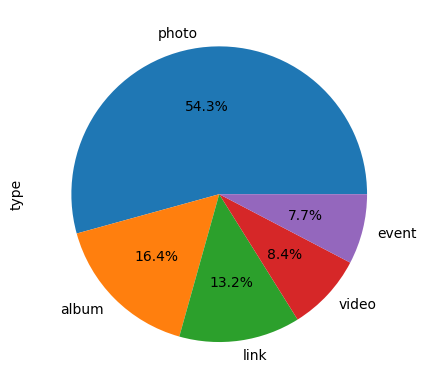

In [58]:
post_by_type = df['type'].value_counts()
post_by_type.plot(kind='pie', autopct='%.1f%%');

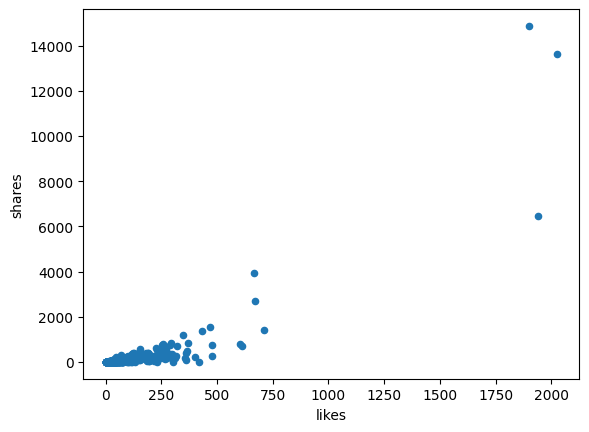

In [59]:
df.plot(kind='scatter', x='likes', y='shares');

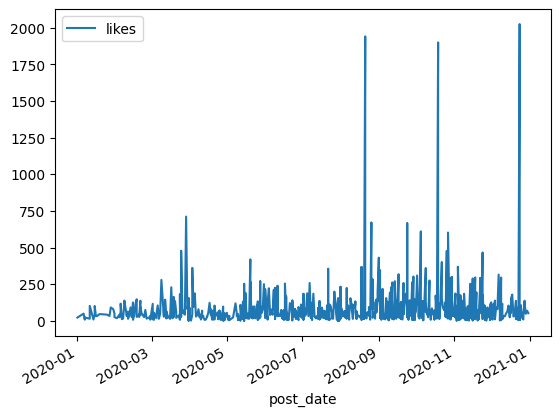

In [60]:
df.plot(x='post_date', y='likes');

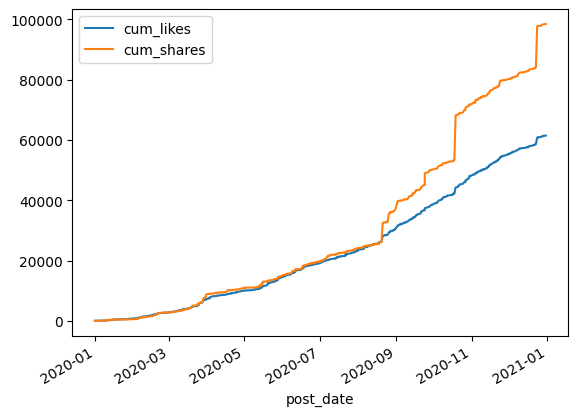

In [61]:
df.plot(x='post_date', y=['cum_likes', 'cum_shares']);

In [62]:
df[(df['post_date'] >= '2020-08-15') & (df['post_date'] < '2020-09-01')].sort_values(by='likes', ascending=False).groupby('type').first()

,id,bkk_datetime,message,link,likes,comments,shares,reactions,love,care,...,cum_likes,cum_shares,q_likes,dow,n_hashtags,n_chars,post_dt,post_hour,post_date,post_diff
type,,,,,,,,,,,,,,,,,,,,,
album,352750091735719_1265072247170161,Wed Aug 19 12:04:00 2020,��️ �� เพราะคนเราตัดสินใจซื้อด้วย ‘อารมณ์’ ���...,https://www.facebook.com/352750091735719/posts...,36,2,13,39,3,0.0,...,26136,26025,Q2,Wed,2.0,1169.0,2020-08-19 12:04:00,12,2020-08-19,1 days
event,352750091735719_221085845995099,Thu Aug 20 21:19:04 2020,None,https://www.facebook.com/events/221085845995099/,12,0,0,12,0,0.0,...,26266,26063,Q1,Thu,NaN,NaN,2020-08-20 21:19:04,21,2020-08-20,0 days
link,352750091735719_1266028757074510,Thu Aug 20 18:11:08 2020,�� #วัดกันตัวต่อตัว �� เทียบให้ดูจะๆ ว่าทำไม F...,https://blog.skooldio.com/figma-vs-sketch-vs-a...,42,0,23,45,2,0.0,...,26254,26063,Q3,Thu,3.0,267.0,2020-08-20 18:11:08,18,2020-08-20,0 days
photo,352750091735719_1266500150360704,Fri Aug 21 08:27:00 2020,�� เพราะ ‘ทักษะ’ สำคัญกว่า ‘ปริญญา’ ��‍��\n.\n...,https://www.facebook.com/skooldio/photos/a.457...,1940,227,6473,1979,21,0.0,...,28206,32536,Q4,Fri,2.0,763.0,2020-08-21 08:27:00,8,2020-08-21,1 days
video,352750091735719_1273782059632513,Sun Aug 30 09:27:28 2020,��‍�� #อยากย้ายสายงานห้ามพลาด จบวิศวะนาโน แต่ข...,https://www.facebook.com/nichawongs/videos/644...,145,4,116,151,6,0.0,...,30099,36369,Q4,Sun,3.0,602.0,2020-08-30 09:27:28,9,2020-08-30,1 days


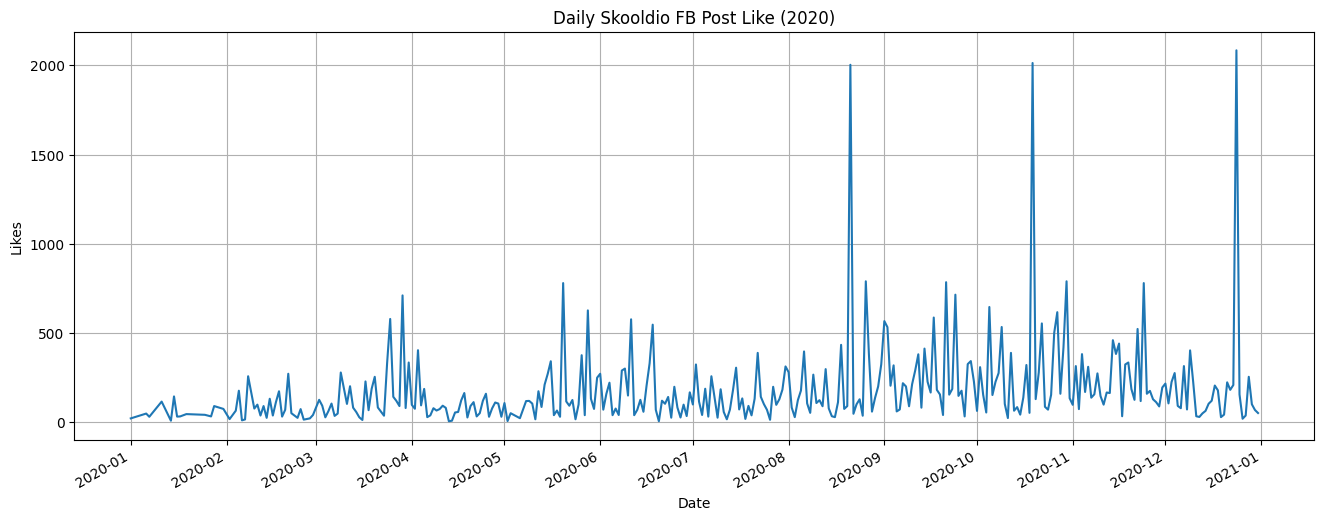

In [63]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

ax = df.groupby('post_date')['likes'].sum().plot(kind='line', 
                                            figsize=(16,6),
                                            title="Daily Skooldio FB Post Like (2020)",
                                            xlabel="Date",
                                            ylabel="Likes",
                                            grid=True)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.show()

In [ ]:
import plotly.express as px

fig = px.line(df, x='post_date', y='likes', title="Daily Skooldio FB Post Like (2020)")

plt.show()

## Pivot

In [65]:
df['dow'] = df['post_dt'].dt.dayofweek.astype(str) + "_" + df['bkk_datetime'].str[0:3] # day of week
df[['bkk_datetime', 'dow']].head()

,bkk_datetime,dow
0,Wed Jan 1 00:00:04 2020,2_Wed
1,Mon Jan 6 08:00:09 2020,0_Mon
2,Tue Jan 7 11:33:26 2020,1_Tue
3,Tue Jan 7 19:38:58 2020,1_Tue
4,Sat Jan 11 09:19:30 2020,5_Sat


In [66]:
df_ten = df.head(10).copy()
df_ten = df[['dow', 'type', 'likes']]
df_ten

,dow,type,likes
0,2_Wed,link,22
1,0_Mon,album,49
2,1_Tue,photo,8
3,1_Tue,video,23
4,5_Sat,album,14
...,...,...,...
777,0_Mon,photo,118
778,1_Tue,album,53
779,1_Tue,album,48
780,2_Wed,photo,69


In [67]:
pd.pivot_table(df_ten, index='type', columns='dow', values='likes', aggfunc='sum', fill_value=0)

dow,0_Mon,1_Tue,2_Wed,3_Thu,4_Fri,5_Sat,6_Sun
type,,,,,,,
album,514,1291,832,1075,1340,1477,573
event,189,710,532,168,49,305,64
link,604,1003,816,743,620,557,1506
photo,8759,5359,6116,8457,7826,2784,2417
video,452,464,906,1823,178,454,333


In [69]:
df_ten.groupby(['type', 'dow'])['likes'].sum().to_frame('sum')

sum
type  dow        
album 0_Mon   514
      1_Tue  1291
      2_Wed   832
      3_Thu  1075
      4_Fri  1340
      5_Sat  1477
      6_Sun   573
event 0_Mon   189
      1_Tue   710
      2_Wed   532
      3_Thu   168
      4_Fri    49
      5_Sat   305
      6_Sun    64
link  0_Mon   604
      1_Tue  1003
      2_Wed   816
      3_Thu   743
      4_Fri   620
      5_Sat   557
      6_Sun  1506
photo 0_Mon  8759
      1_Tue  5359
      2_Wed  6116
      3_Thu  8457
      4_Fri  7826
      5_Sat  2784
      6_Sun  2417
video 0_Mon   452
      1_Tue   464
      2_Wed   906
      3_Thu  1823
      4_Fri   178
      5_Sat   454
      6_Sun   333

In [70]:
df_ten.groupby(['type', 'dow'])['likes'].sum().unstack().fillna(0).astype(int)

dow,0_Mon,1_Tue,2_Wed,3_Thu,4_Fri,5_Sat,6_Sun
type,,,,,,,
album,514,1291,832,1075,1340,1477,573
event,189,710,532,168,49,305,64
link,604,1003,816,743,620,557,1506
photo,8759,5359,6116,8457,7826,2784,2417
video,452,464,906,1823,178,454,333


In [71]:
pd.crosstab(df['type'], df['dow'])

dow,0_Mon,1_Tue,2_Wed,3_Thu,4_Fri,5_Sat,6_Sun
type,,,,,,,
album,8,19,15,20,29,24,11
event,5,28,6,7,4,5,4
link,13,15,18,16,10,13,17
photo,66,59,73,83,61,42,34
video,7,11,10,16,6,10,5


In [72]:
pd.pivot_table(df, index='post_hour', columns='dow', values='likes', aggfunc='mean', fill_value=0).astype(int)

dow,0_Mon,1_Tue,2_Wed,3_Thu,4_Fri,5_Sat,6_Sun
post_hour,,,,,,,
0,0,0,22,0,0,0,0
6,0,0,0,44,0,0,0
7,70,100,44,46,71,87,0
8,267,105,139,219,193,103,68
9,124,7,79,24,109,58,64
10,0,109,59,12,20,59,34
11,6,14,40,19,111,25,16
12,23,27,56,57,71,51,73
13,21,20,53,33,22,65,24
